In [46]:
from gpaw import GPAW
from gpaw import spinorbit
from gpaw.spinorbit import soc_eigenstates
calc = GPAW("Te_pw.gpw")
soc = soc_eigenstates(calc)
print(soc)
calc.get_eigenvalues().shape
soc.get_wave_functions()


AttributeError: 'BZWaveFunctions' object has no attribute 'get_wave_functions'

In [23]:
import numpy as np


soc.eigenvectors()

array([[[ 1.82397118e-05+0.00000000e+00j,
          8.82114519e-01+4.70945366e-01j,
          4.93638533e-07+1.03488584e-06j, ...,
          1.84457583e-08-7.33579791e-08j,
          1.51084073e-04+3.58349961e-05j,
         -1.52152277e-05+1.73483472e-05j],
        [-9.99949809e-01+0.00000000e+00j,
          1.60872071e-05+8.59968755e-06j,
         -6.91137856e-07+1.70686055e-06j, ...,
          1.26247701e-05+4.80059634e-04j,
         -2.06038768e-06+2.45913689e-05j,
          4.41506695e-04+2.31904295e-04j],
        [ 2.27130556e-06+0.00000000e+00j,
          4.45522697e-07-1.12618488e-06j,
         -8.45397597e-01+5.34005033e-01j, ...,
         -7.16096119e-08-1.13935069e-07j,
         -3.53659343e-05+3.81188903e-04j,
          6.22184248e-05+1.08646394e-04j],
        ...,
        [ 2.11649713e-07+0.00000000e+00j,
          7.47888571e-07+1.40212249e-06j,
         -4.62499149e-04-1.10837626e-04j, ...,
          4.36955153e-04+3.36639949e-05j,
         -7.12301484e-03-6.71826245e-03j

In [44]:
reclatt = calc.atoms.get_reciprocal_cell()
reallatt = calc.atoms.get_cell()
G_Gv = calc.wfs.pd.get_reciprocal_vectors(q=4, add_q=False)
G_Gv @ np.linalg.inv(reclatt)/3.32491847
# psit_nG = np.array([calc.wfs.kpt_u[ik].psit_nG[n]
                        # for n in bands])
reclatt @ reallatt.T

/tmp/ipykernel_203188/933101586.py:1: DeprecationWarning: Please use atoms.cell.reciprocal()
  reclatt = calc.atoms.get_reciprocal_cell()


array([[ 1.00000000e+00, -7.77317221e-17,  0.00000000e+00],
       [-1.26842981e-17,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [29]:
G_Gv.shape

(1445, 3)

In [56]:
calc = GPAW("Te.gpw")
soc = spinorbit.soc_eigenstates(calc)

In [57]:
e_g = soc.eigenvalues()[3]
split = e_g[1::2] - e_g[0::2]
print(split)

[9.19871221e-07 7.43474910e-03 5.67290960e-07 4.63626073e-06
 5.60736786e-02 7.95451426e-06 8.13639306e-06 1.57868862e-05
 1.21191965e-01 6.71112628e-02 1.13924614e-01 1.69608088e-06
 1.68017767e-05 9.84064063e-03 2.65761125e-05 1.06405973e-04]


ValueError: Unknown structure: trigomal.

In [62]:
te.cell

Cell([[1.0, 0.0, 0.0], [-0.5, 0.8660254037844386, 0.0], [0.0, 0.0, 1.2]])

(16, 51) (51, 32)


ValueError: x and y must have same first dimension, but have shapes (51, 3) and (16,)

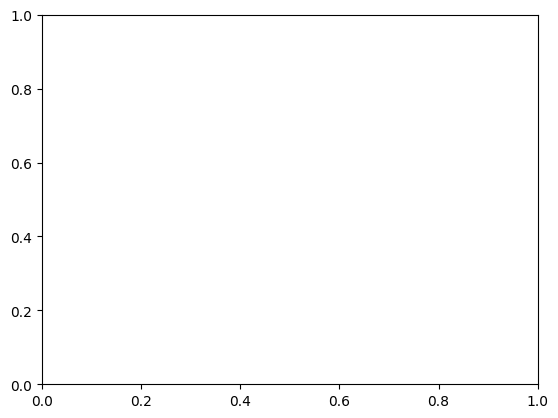

In [88]:
from matplotlib import pyplot as plt


calc = GPAW("Te_bands.gpw")
soc = soc_eigenstates(calc)
kpt = calc.get_ibz_k_points()
en=np.array([calc.get_eigenvalues(ik) for ik in range(len(kpt))])
en_soc = soc.eigenvalues()
print (en.shape, en_soc.shape)

for e in en.T:
    plt.plot(kpt, e, c='k')
for e in en_soc.T:
    plt.plot(kpt, e, c='r')

plt.show()

# for i in range(51):
#     e = soc.eigenvalues()[i]
#     # print(e)
#     diff = e[1::2] - e[0::2]
#     print(i,diff[:-2].max())
